In [225]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [226]:
# Precision of fortran tag
int_precision = 'int32'
# Precision of data in input file
float_precision = 'float32'
# Precision of data in input file
logical_precision = 'int32'

In [227]:
# Initialize outputs in case file does not exist or is empty
nodata = -9999
date_time = {
    'year': nodata,
    'month': nodata,
    'day': nodata,
    'hour': nodata,
    'min': nodata,
    'sec': nodata,
    'dofyr': nodata,
    'pentad': nodata
}

obs_assim = []
obs_species = []
obs_tilenum = []
obs_lon = []
obs_lat = []
obs_obs = []
obs_obsvar = []
obs_fcst = []
obs_fcstvar = []
obs_ana = []
obs_anavar = []

In [228]:
# Determine machine format
machfmt = 'b'

In [229]:
# Determine filename
fname = '/Users/amfox/Documents/ASCAT_M36.ens_avg.ldas_ObsFcstAna.20190701_0300z.bin'
tmpname = fname.split('/')
pname = tmpname[len(tmpname)-1]

In [230]:
print(f'Reading from {fname}')
# Open file in read mode and specify endianness
mode = 'rb' if machfmt == 'b' else 'rl'
ifp = open(fname, mode)

Reading from /Users/amfox/Documents/ASCAT_M36.ens_avg.ldas_ObsFcstAna.20190701_0300z.bin


In [231]:
# Read N_obs and time stamp entry
fortran_tag = np.fromfile(ifp, int_precision, 1)
N_obs = np.fromfile(ifp, int_precision, 1)
N_obs = int(N_obs)
year = np.fromfile(ifp, int_precision, 1)
month = np.fromfile(ifp, int_precision, 1)
day = np.fromfile(ifp, int_precision, 1)
hour = np.fromfile(ifp, int_precision, 1)
minute = np.fromfile(ifp, int_precision, 1)
second = np.fromfile(ifp, int_precision, 1)
dofyr = np.fromfile(ifp, int_precision, 1)
pentad = np.fromfile(ifp, int_precision, 1)
fortran_tag = np.fromfile(ifp, int_precision, 1)
# Populate date_time structure
date_time = {
    'year': year,
    'month': month,
    'day': day,
    'hour': hour,
    'min': minute,
    'sec': second,
    'dofyr': dofyr,
    'pentad': pentad
}

In [232]:
# Read observation assim flag
fortran_tag = np.fromfile(ifp, int_precision, 1)
tmp_data = np.fromfile(ifp, logical_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_assim = np.zeros((N_obs, 1))
indices = np.where(tmp_data != 0)[0]
obs_assim[indices] = 1

In [233]:
# Read species information
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_species = np.fromfile(ifp, int_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)

In [234]:
# Read tile number information
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_tilenum = np.fromfile(ifp, int_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)

# Read longitude
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_lon = np.fromfile(ifp, float_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)

# Read latitude
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_lat = np.fromfile(ifp, float_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)

# Read observation value
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_obs = np.fromfile(ifp, float_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)

# Read observation variance
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_obsvar = np.fromfile(ifp, float_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)

# Read observation-space model forecast value
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_fcst = np.fromfile(ifp, float_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)

# Read observation-space model forecast variance
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_fcstvar = np.fromfile(ifp, float_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)

# Read observation-space analysis value
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_ana = np.fromfile(ifp, float_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)

# Read observation-space analysis variance
fortran_tag = np.fromfile(ifp, int_precision, 1)
obs_anavar = np.fromfile(ifp, float_precision, N_obs)
fortran_tag = np.fromfile(ifp, int_precision, 1)

In [235]:
# No-data check
#  - single ensemble member integrations yield obs_obsvar==nodata)  
#  - in some cases obs_fcst (a.k.a. Obs_pred) is no-data-value, 
#     eg. SMOS Tb when snow is present)

obs_obsvar[obs_obsvar == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan
obs_fcstvar[obs_fcstvar == nodata] = np.nan
obs_ana[obs_ana == nodata] = np.nan
obs_anavar[obs_anavar == nodata] = np.nan

In [236]:
# Close file
ifp.close()

In [237]:
#information for plotting

import cartopy.crs as ccrs

metric = 'ombg' # 'ObsValue'
colmin = None
colmax = None
units = None

In [238]:
# Make obarray
    
numobs = len(obs_obs)

obarray = np.empty([numobs, 3])

if metric == 'ObsValue':
    obarray[:, 0] = obs_obs
if metric == 'ombg':
    obarray[:, 0] = obs_obs - obs_fcst

obarray[:, 1] = obs_lon
obarray[:, 2] = obs_lat


# Compute and print some stats for the data
# -----------------------------------------
stdev = np.nanstd(obarray[:,0])  # Standard deviation
omean = np.nanmean(obarray[:, 0]) # Mean of the data
datmi = np.nanmin(obarray[:, 0])  # Min of the data
datma = np.nanmax(obarray[:, 0])  # Max of the data

print("Plotted data statistics: ")
print("Mean: ", omean)
print("Standard deviation: ", stdev)
print("Minimum ", datmi)
print("Maximum: ", datma)

Plotted data statistics: 
Mean:  0.3997157945558874
Standard deviation:  0.224787294290707
Minimum  -0.3038240373134613
Maximum:  0.9212681651115417


In [239]:
# Norm for scatter plot
# ---------------------
norm = None


# Min max for colorbar
# --------------------
if np.nanmin(obarray[:, 0]) < 0:
    cmax = datma
    cmin = datmi
    cmap = 'RdBu'
else:
    cmax = omean+stdev
    cmin = np.maximum(omean-stdev, 0.0)
    cmap = 'viridis'

if metric == 'ObsValue':
    cmin = datmi
    cmax = datma

if metric == 'PreQC' or metric == 'EffectiveQC':
    cmin = datmi
    cmax = datma

# Specialized colorbar for integers
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmaplist[1] = (.5, .5, .5, 1.0)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    bounds = np.insert(np.linspace(0.5, int(cmax)+0.5, int(cmax)+1), 0, 0)
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# If using omb then use standard deviation for the cmin/cmax
if metric=='omb' or metric=='ombg' or metric=='oman':
    cmax = stdev
    cmin = -stdev

# Override with user chosen limits
if (colmin!=None):
    print("Using user provided minimum for colorbar")
    cmin = colmin
if (colmax!=None):
    print("Using user provided maximum for colorbar")
    cmax = colmax

 Saving figure as ASCAT_M36.ens_avg.ldas_ObsFcstAna.20190701_0300z.bin_ombg.png 



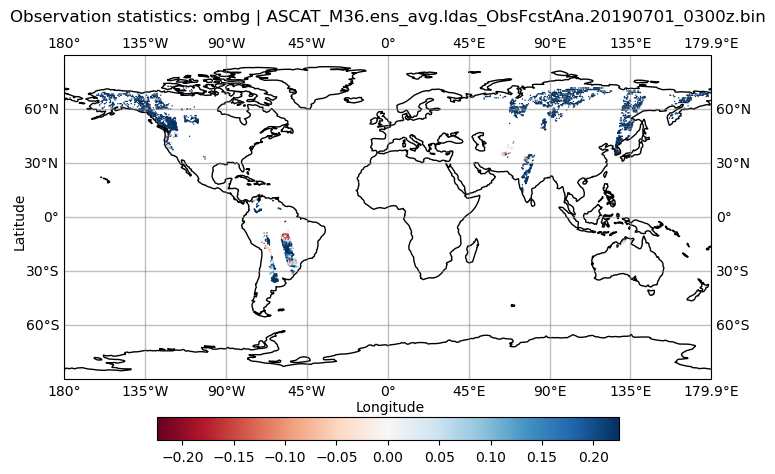

In [240]:
# Create figure
# -------------

fig = plt.figure(figsize=(10, 5))

# initialize the plot pointing to the projection
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

# plot grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(central_longitude=0), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='-')

gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-180, -135, -90, -45, 0, 45, 90, 135, 179.9])
ax.set_ylabel("Latitude",  fontsize=7)
ax.set_xlabel("Longitude", fontsize=7)

ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

# scatter data
sc = ax.scatter(obarray[:, 1], obarray[:, 2],
                c=obarray[:, 0], s=1, linewidth=0,
                transform=ccrs.PlateCarree(), cmap=cmap, vmin=cmin, vmax=cmax, norm=norm)

# colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=.1, fraction=0.06,)
if not units==None:
    cbar.ax.set_ylabel(units, fontsize=10)

# plot globally
ax.set_global()

# draw coastlines
ax.coastlines()

# figure labels
plt.title("Observation statistics: "+metric+" | "+
          pname, y=1.08)
ax.text(0.45, -0.1,   'Longitude', transform=ax.transAxes, ha='left')
ax.text(-0.08, 0.4, 'Latitude', transform=ax.transAxes, rotation='vertical', va='bottom')

savename = pname+'_'+metric+'.png'

print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)

In [241]:
np.nanmean(obs_ana), np.nanmean(obs_fcst)

(0.25944296, 0.25944296)

In [242]:
pname


'ASCAT_M36.ens_avg.ldas_ObsFcstAna.20190701_0300z.bin'